In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plot_fun import subplot_results

### Settings

In [12]:
N = 4 # runs
Kx_family = 'step'
Kx = [[8]] # Step
Kb = [[3]] # Polynomial
epochs = 100
refinement_epochs = 100
lvls = [-1, 1]
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family)

### Continuous

In [13]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 133.92it/s]


Best objective value (A): 219.43


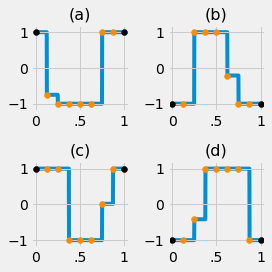

In [14]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### Discrete

In [15]:
optimizer_s_on_f = CordexDiscrete(model=s_on_f_model, runs=N, levels=lvls)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 512.00it/s]


Best objective value (A): 228.34


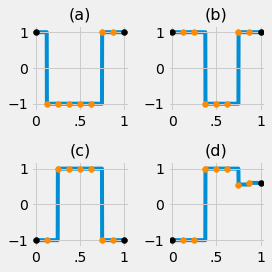

In [16]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### NBDO

In [17]:
# Test input

# inputs_dict = {
#     "x1" : ['f', 16, "b-spline"],
#     "x2" : ['f', 30, "fourier"],
#     "x3" : ['s']
# }
#
# params_dict = {
#     "b1" : ['f', 2, "fourier"],
#     "b2" : ['f', 3, "b-splines"],
#     "b3" : ['s']
# }

### Test Js

In [18]:
# Step - Poly
s_on_f_model = ScalarOnFunctionModel(Kx=[Kx[0][0]-1], Kb= Kb[0], Kx_family=Kx_family)
s_on_f_model.get_Jcb()

array([[0.14285714, 0.01020408, 0.00097182],
       [0.14285714, 0.03061224, 0.00680272],
       [0.14285714, 0.05102041, 0.01846453],
       [0.14285714, 0.07142857, 0.03595724],
       [0.14285714, 0.09183673, 0.05928086],
       [0.14285714, 0.1122449 , 0.08843537],
       [0.14285714, 0.13265306, 0.1234208 ]])

In [19]:
# B-spline - Poly
k_degree = 0
Kx_family = 'b-spline'
s_on_f_model = ScalarOnFunctionModel(Kx=[Kx[0][0]-1], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree, knots_num=Kx[0][0])
s_on_f_model.get_Jcb()

array([[0.14285714, 0.01020408, 0.00097182],
       [0.14285714, 0.03061224, 0.00680272],
       [0.14285714, 0.05102041, 0.01846453],
       [0.14285714, 0.07142857, 0.03595724],
       [0.14285714, 0.09183673, 0.05928086],
       [0.14285714, 0.1122449 , 0.08843537],
       [0.14285714, 0.13265306, 0.1234208 ]])